In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('listings summary.csv')

In [16]:
df.dtypes
# do we care about id, name, host_id, host_name (identifiers)?

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [17]:
df.isnull().sum()
# there is missing data! what do we do?!?

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        652
reviews_per_month                  652
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1053
dtype: int64

In [18]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [19]:
df['license'].unique()

array(['STR-OPLI-19-002837', 'str-opli-19-002622', 'STR-OPLI-19-003039',
       ..., 'STR-OPLI-20-000869', 'STR-OPLI-21-000608',
       'STR-OPLI-19-002856'], dtype=object)

In [20]:
df['neighbourhood_group'] = pd.Categorical(df['neighbourhood_group'])
df['neighbourhood_group_code'] = df['neighbourhood_group'].cat.codes

In [21]:
df['neighbourhood_group_code'].unique()

array([ 4, 11, 16,  5,  0,  1,  3,  2, 12,  6,  9,  8, 13, 15, 10, 14,  7],
      dtype=int8)

Text(0, 0.5, 'Counts')

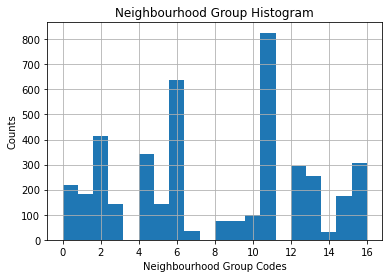

In [26]:
df.hist(column='neighbourhood_group_code', bins = 20)
plt.title('Neighbourhood Group Histogram')
plt.xlabel('Neighbourhood Group Codes')
plt.ylabel('Counts')

In [27]:
df['neighbourhood'] = pd.Categorical(df['neighbourhood'])
df['neighbourhood_code'] = df['neighbourhood'].cat.codes

In [28]:
df['neighbourhood_code'].unique()

array([41, 80, 24, 18, 29, 85, 39, 46, 17, 21,  1, 25, 28, 61, 38, 57, 14,
        4, 36, 50, 55, 82, 20,  9,  2, 34, 52, 26, 11, 13, 49, 42, 23, 12,
       64, 77, 71,  3,  8,  0, 43, 16, 60, 30, 83, 27, 40, 19, 84, 44, 47,
       37, 76, 51,  6, 10, 69,  5, 65,  7, 33, 79, 75, 54, 58, 87, 35, 86,
       62, 68, 78, 66, 22, 15, 74, 56, 81, 53, 59, 48, 45, 63, 70, 32, 73,
       72, 67, 31], dtype=int8)

Text(0, 0.5, 'Counts')

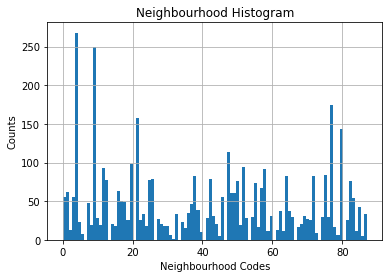

In [29]:
df.hist(column='neighbourhood_code', bins = 100)
plt.title('Neighbourhood Histogram')
plt.xlabel('Neighbourhood Codes')
plt.ylabel('Counts')

In [23]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group_code
id,1.000000,0.469123,-0.115264,0.024447,0.054339,-0.057321,-0.583579,0.115852,0.256267,0.066139,-0.130905,-0.089908
host_id,0.469123,1.000000,-0.055703,0.074124,0.031915,-0.017651,-0.265292,0.041577,0.067942,0.082631,-0.075681,-0.025111
latitude,-0.115264,-0.055703,1.000000,-0.118204,0.001719,0.052138,0.040695,-0.049478,0.009384,0.001050,-0.020501,-0.017342
longitude,0.024447,0.074124,-0.118204,1.000000,-0.045046,0.030923,-0.057334,-0.030739,0.028380,-0.002821,-0.079986,-0.147471
price,0.054339,0.031915,0.001719,-0.045046,1.000000,0.074901,-0.114551,-0.078834,-0.005114,0.076917,-0.084917,-0.002086
minimum_nights,-0.057321,-0.017651,0.052138,0.030923,0.074901,1.000000,-0.196388,-0.254873,0.225742,0.210980,-0.362231,-0.057070
number_of_reviews,-0.583579,-0.265292,0.040695,-0.057334,-0.114551,-0.196388,1.000000,0.263169,-0.238220,-0.126797,0.585162,0.003721
reviews_per_month,0.115852,0.041577,-0.049478,-0.030739,-0.078834,-0.254873,0.263169,1.000000,-0.145152,-0.067290,0.456939,-0.018816
calculated_host_listings_count,0.256267,0.067942,0.009384,0.028380,-0.005114,0.225742,-0.238220,-0.145152,1.000000,0.231524,-0.235062,-0.134181
availability_365,0.066139,0.082631,0.001050,-0.002821,0.076917,0.210980,-0.126797,-0.067290,0.231524,1.000000,-0.150302,-0.019423
